# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Assign the dataset to the variable named as iris_data

In [2]:
iris_data = pd.read_csv('IRIS.csv')

# Read the first five record of the given dataset

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Display the names of the columns

In [4]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Display the datatype of each column

In [5]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Describe the object column from the given datset

In [6]:
iris_data.select_dtypes('object').describe()

,species
count,150
unique,3
top,Iris-setosa
freq,50


# Display the total no of unique items in species column

In [7]:
iris_data['species'].nunique()

3

# Display the names of the unique items in the species column

In [8]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Define a function which convert the  datatype of species column to int

In [9]:
def iris_convert(x):
    if (x == 'Iris-setosa'):
        return 0
    elif (x == 'Iris-versicolor'):
        return 1
    elif (x == 'Iris-virginica'):
        return 2

# Apply this function to the species column

In [10]:
iris_data['species'] = iris_data['species'].apply(iris_convert)

# Read the first five record of the species column 

In [11]:
iris_data['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Make the feature map for this dataset

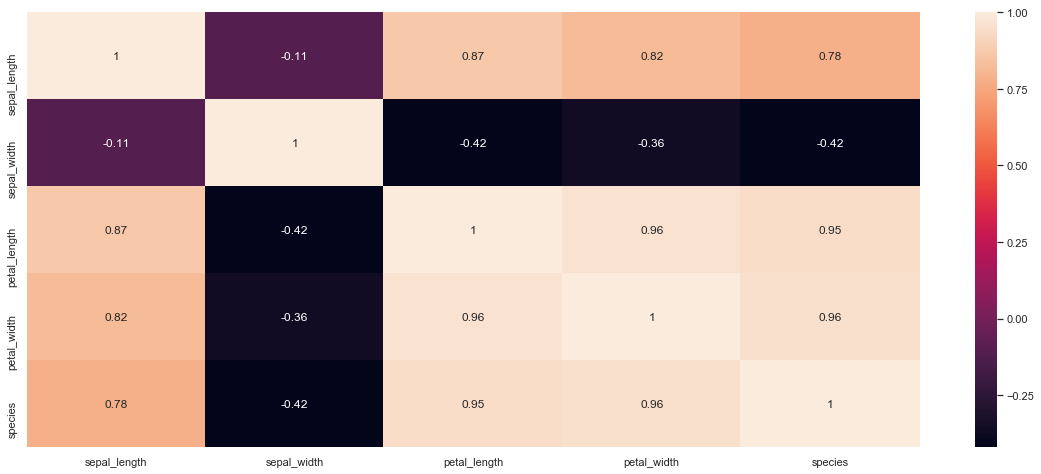

In [12]:
sns.set()
plt.figure(figsize=(20, 8))
sns.heatmap(iris_data.corr(), annot=True)

# Divide the dataset to the training and output data

In [13]:
training_data = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [14]:
output_data = iris_data[['species']]

In [15]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

# Use the random forest algorithm for this dataset

In [16]:
rf_model = RandomForestClassifier(n_estimators = 30)
rf_model.fit(X, Y)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rf_predictions = rf_model.predict(x_test)

In [18]:
rf_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [19]:
rf_score = accuracy_score(rf_predictions, y_test)

In [20]:
rf_score

1.0

# Use the logistic regression algorithm for this dataset

In [21]:
lr_model = LogisticRegression()
lr_model.fit(X, Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
lr_predictions = lr_model.predict(x_test)
lr_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0], dtype=int64)

In [23]:
lr_score = accuracy_score(lr_predictions, y_test)
lr_score

0.9777777777777777

# Make the confusion matrix for this algo

In [24]:
confusion_matrix(lr_predictions, y_test)

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]], dtype=int64)

# Use the support vector machine algorithm

In [25]:
svm_model = SVC()
svm_model.fit(X ,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
svm_predictions = svm_model.predict(x_test)
svm_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [27]:
svm_score = accuracy_score(svm_predictions, y_test)
svm_score

1.0

# Make the confusion matrix for this algo

In [28]:
confusion_matrix(svm_predictions, y_test)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Use the cross_val_score for RandomForestClassifier

In [29]:
rf_cross_score = cross_val_score(RandomForestClassifier(), X, Y, cv=5)
np.average(rf_cross_score)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimato

0.9327272727272728

# Use the cross val_score for LogisticRegression

In [30]:
lr_cross_score = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y, cv=5)
np.average(lr_cross_score)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.9340316205533596

# Use the cross_val_score for SVM

In [31]:
svm_cross_score = cross_val_score(SVC(gamma = 'auto'), X, Y, cv = 5)
np.average(svm_cross_score)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

0.9518181818181818

In [32]:
## In this dataset we achieve the accuracy upto 100%  by using some algorithm which means the overfitting of model.
## So we have to reduce the accuracy, for that purpose we are using the cross_val_score
